170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 50ms/step - accuracy: 0.3293 - loss: 2.1182 - val_accuracy: 0.5148 - val_loss: 1.3173 - learning_rate: 0.0010
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.5394 - loss: 1.2872 - val_accuracy: 0.6436 - val_loss: 1.0128 - learning_rate: 0.0010
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.6245 - loss: 1.0739 - val_accuracy: 0.7000 - val_loss: 0.8666 - learning_rate: 0.0010
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.6627 - loss: 0.9629 - val_accuracy: 0.6652 - val_loss: 1.0122 - learning_rate: 0.0010
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.6881 - loss: 0.8880 - val_accuracy: 0.6768 - val_loss: 0.9982 - learning_rate: 0.0010
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 38ms/step - accuracy: 0.7142 - loss: 0.8275 - val_accuracy: 0.7195 - val_loss: 0.8262 - learning_rate: 0.0010
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.7275 - loss: 

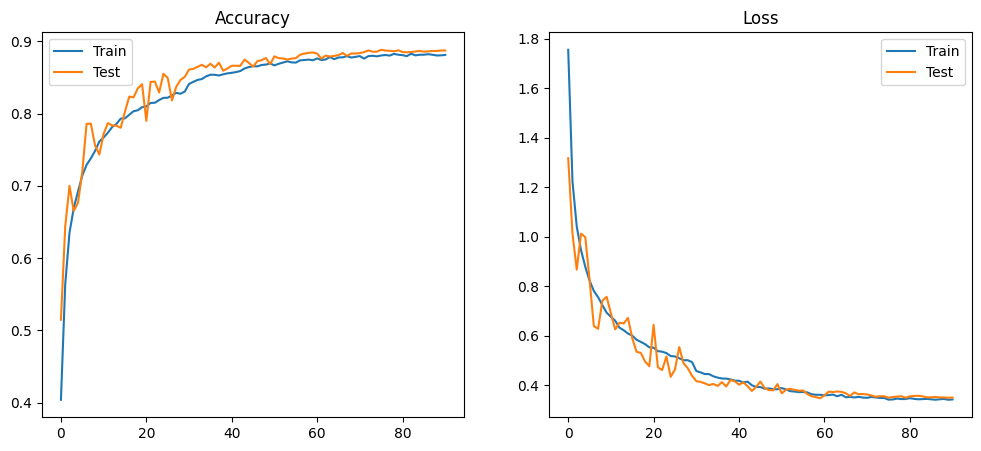

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
)
datagen.fit(x_train)

# Model architecture
def build_model():

    model = models.Sequential()

    # First Block
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D())
    model.add(layers.Dropout(0.25))

    # Second Block
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D())
    model.add(layers.Dropout(0.35))

    # Third Block (reduced)
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D())
    model.add(layers.Dropout(0.4))

    # Dense Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))

    return model


model = build_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=5, factor=0.5, verbose=1)
early_stop = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)

# Train
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    validation_data=(x_test, y_test),
                    epochs=100,
                    callbacks=[lr_reduction, early_stop],
                    verbose=1)

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Plotting
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


[[Text(0.5, 0, '0'),
  Text(1.5, 0, '1'),
  Text(2.5, 0, '2'),
  Text(3.5, 0, '3'),
  Text(4.5, 0, '4'),
  Text(5.5, 0, '5'),
  Text(6.5, 0, '6'),
  Text(7.5, 0, '7'),
  Text(8.5, 0, '8'),
  Text(9.5, 0, '9')],
 [Text(0, 0.5, '0'),
  Text(0, 1.5, '1'),
  Text(0, 2.5, '2'),
  Text(0, 3.5, '3'),
  Text(0, 4.5, '4'),
  Text(0, 5.5, '5'),
  Text(0, 6.5, '6'),
  Text(0, 7.5, '7'),
  Text(0, 8.5, '8'),
  Text(0, 9.5, '9')]]

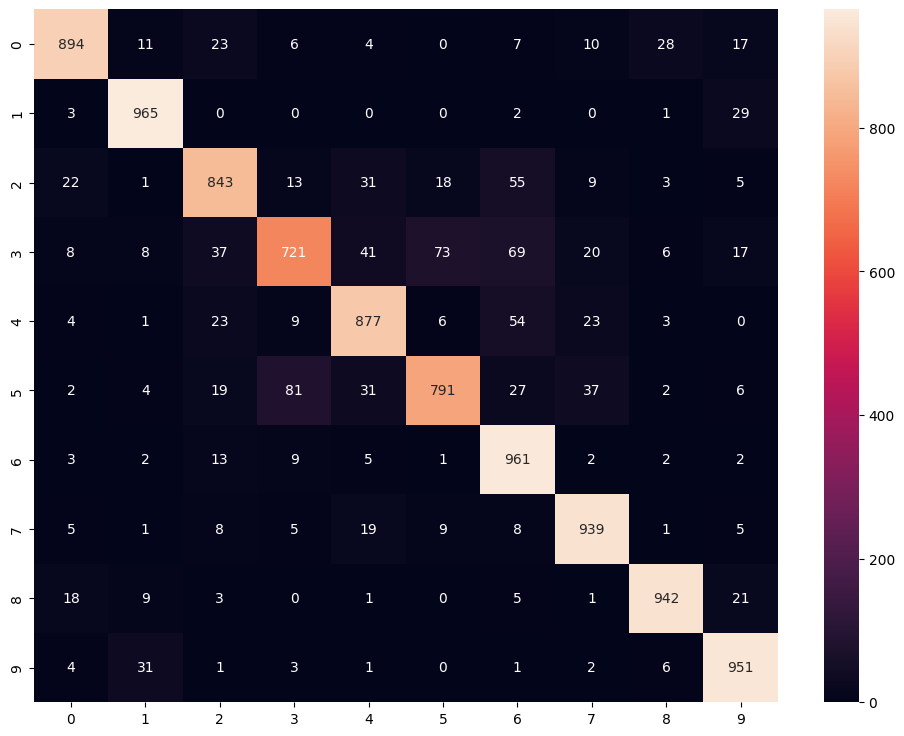

In [4]:
# Predict the values from the validation dataset
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred,axis = 1)
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)


plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=cifar10_labels, yticklabels=cifar10_labels)

In [3]:
import os
import json

# Create a folder to save everything
save_dir = "model_info"
os.makedirs(save_dir, exist_ok=True)

# 1. Save model architecture
with open(os.path.join(save_dir, "model_architecture.txt"), "w") as f:
    f.write(model.to_json())

# 2. Save model weights
model.save_weights(os.path.join(save_dir, "model_weights.weights.h5"))

# 3. Save training configuration
training_config = {
    "optimizer": "adam",
    "loss": "categorical_crossentropy",
    "metrics": ["accuracy"]
}
with open(os.path.join(save_dir, "training_config.json"), "w") as f:
    json.dump(training_config, f, indent=4)

# 4. Save training history
with open(os.path.join(save_dir, "training_history.json"), "w") as f:
    json.dump(history.history, f, indent=4)

# 5. Save class labels (CIFAR-10)
cifar10_labels = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}
with open(os.path.join(save_dir, "class_labels.json"), "w") as f:
    json.dump(cifar10_labels, f, indent=4)

# 6. Save evaluation results
with open(os.path.join(save_dir, "evaluation_results.txt"), "w") as f:
    f.write(f"Test Loss: {test_loss}\n")
    f.write(f"Test Accuracy: {test_acc * 100:.2f}%\n")

print(f"All files saved in folder: {save_dir}")


All files saved in folder: model_info


In [5]:
import shutil

# Create a zip file from the folder
shutil.make_archive("model_info", 'zip', "model_info")

'/content/model_info.zip'

In [6]:
from google.colab import files
files.download("model_info.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
import os
import numpy as np
import json
import random
from tensorflow.keras.models import model_from_json
from tensorflow.keras.datasets import cifar10

# Load model architecture
with open("model_info/model_architecture.txt", "r") as f:
    model_json = f.read()

model = model_from_json(model_json)

# Load weights
model.load_weights("model_info/model_weights.weights.h5")

# Compile (you can match with training config)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Load CIFAR-10 data
(_, _), (x_test, y_test) = cifar10.load_data()
x_test = x_test.astype("float32") / 255.0

# Load label mapping
with open("model_info/class_labels.json", "r") as f:
    label_map = json.load(f)

# Pick 10 random indices
indices = random.sample(range(len(x_test)), 10)

correct = 0
for idx in indices:
    img = np.expand_dims(x_test[idx], axis=0)  # shape (1, 32, 32, 3)
    pred_probs = model.predict(img, verbose=0)[0]
    pred_class = int(np.argmax(pred_probs))
    true_class = int(y_test[idx][0])

    pred_label = label_map[str(pred_class)]
    true_label = label_map[str(true_class)]

    is_correct = pred_class == true_class
    if is_correct:
        correct += 1

    print(f"Image {idx}: Predicted = {pred_class} ({pred_label}), Actual = {true_class} ({true_label})")

print(f"\n✅ Correct predictions: {correct}/10")

Image 9362: Predicted = 9 (truck), Actual = 9 (truck)
Image 9648: Predicted = 3 (cat), Actual = 3 (cat)
Image 27: Predicted = 0 (airplane), Actual = 0 (airplane)
Image 1285: Predicted = 9 (truck), Actual = 9 (truck)
Image 4967: Predicted = 7 (horse), Actual = 7 (horse)
Image 231: Predicted = 1 (automobile), Actual = 1 (automobile)
Image 6630: Predicted = 7 (horse), Actual = 7 (horse)
Image 7248: Predicted = 4 (deer), Actual = 4 (deer)
Image 1679: Predicted = 7 (horse), Actual = 7 (horse)
Image 781: Predicted = 1 (automobile), Actual = 1 (automobile)

✅ Correct predictions: 10/10


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


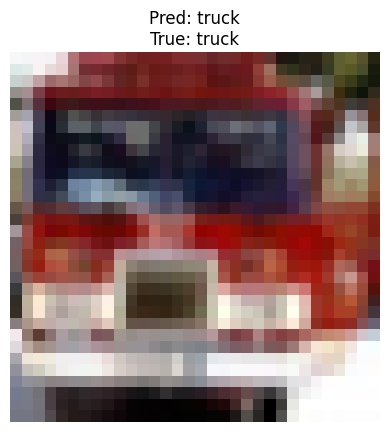

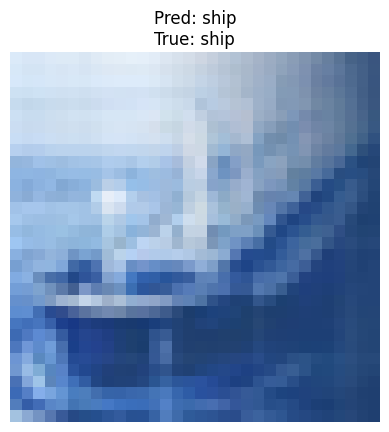

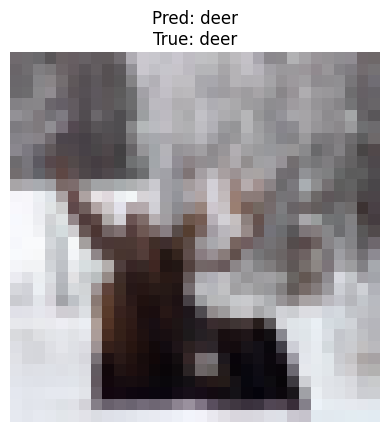

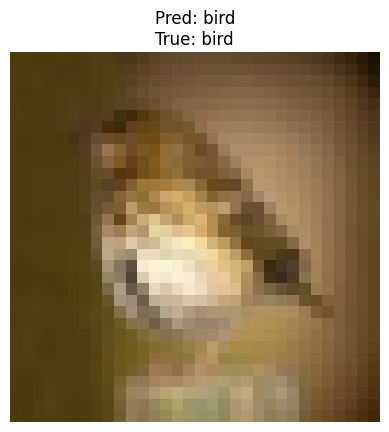

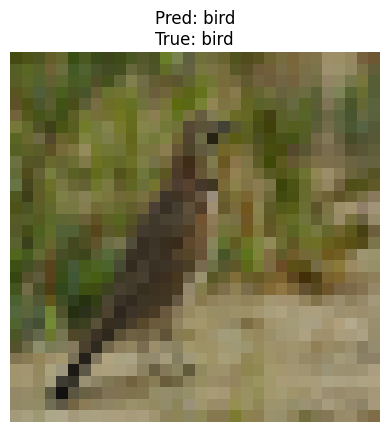

In [8]:
import os
import json
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import model_from_json
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# === 1. Load saved model ===

# Set path to directory where files are saved
save_dir = "model_info"

# Load model architecture
with open(os.path.join(save_dir, "model_architecture.txt"), "r") as f:
    model_json = f.read()
model = model_from_json(model_json)

# Load model weights
model.load_weights(os.path.join(save_dir, "model_weights.weights.h5"))

# Compile model with default config for inference
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Load class labels
with open(os.path.join(save_dir, "class_labels.json"), "r") as f:
    class_labels = json.load(f)
class_labels = {int(k): v for k, v in class_labels.items()}

# === 2. Load CIFAR-10 and randomly select 5 images ===
(_, _), (x_test, y_test) = cifar10.load_data()

# Normalize input data
x_test = x_test.astype("float32") / 255.0

# If model expects one-hot labels during training, we only need raw labels for inference

# Random selection
idx = np.random.choice(len(x_test), size=5, replace=False)
sample_images = x_test[idx]
sample_labels = y_test[idx]

# === 3. Run inference ===
predictions = model.predict(sample_images)

# === 4. Show predictions ===
for i in range(5):
    plt.imshow(sample_images[i])
    plt.axis('off')
    pred_class = np.argmax(predictions[i])
    true_class = sample_labels[i][0]
    plt.title(f"Pred: {class_labels.get(pred_class, pred_class)}\nTrue: {class_labels.get(true_class, true_class)}")
    plt.show()

In [10]:
import os
import shutil
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import model_from_json

# === CONFIG ===
model_arch_file = "model_info/model_architecture.txt"
weights_file = "model_info/model_weights.weights.h5"
weights_dir = "weights_txt"

# === Step 1: Clean the output folder ===
if os.path.exists(weights_dir):
    shutil.rmtree(weights_dir)
os.makedirs(weights_dir)

# === Step 2: Load model architecture ===
with open(model_arch_file, "r") as f:
    model_json = f.read()
model = model_from_json(model_json)

# === Step 3: Load weights ===
model.load_weights(weights_file)

# === Step 4: Export weights for each layer ===
for i, layer in enumerate(model.layers):
    weights = layer.get_weights()
    if not weights:
        continue  # Skip layers like Dropout, Pooling, Flatten

    for j, arr in enumerate(weights):
        # Determine the kind of weight
        if isinstance(layer, tf.keras.layers.BatchNormalization):
            kinds = ["gamma", "beta", "moving_mean", "moving_variance"]
            kind = kinds[j]
        else:
            kind = "kernel" if j == 0 else "bias"

        # Save flat weights
        weights_path = os.path.join(weights_dir, f"layer_{i}_{kind}.txt")
        np.savetxt(weights_path, arr.flatten(), fmt="%.18e")

        # Save shape
        shape_path = os.path.join(weights_dir, f"layer_{i}_{kind}_shape.txt")
        with open(shape_path, "w") as f:
            f.write(" ".join(map(str, arr.shape)))

print(f"✅ All layer weights exported to '{weights_dir}' as plain .txt files.")


✅ All layer weights exported to 'weights_txt' as plain .txt files.


In [11]:
!ls weights_txt/

layer_0_bias_shape.txt		    layer_20_moving_mean_shape.txt
layer_0_bias.txt		    layer_20_moving_mean.txt
layer_0_kernel_shape.txt	    layer_20_moving_variance_shape.txt
layer_0_kernel.txt		    layer_20_moving_variance.txt
layer_12_bias_shape.txt		    layer_22_bias_shape.txt
layer_12_bias.txt		    layer_22_bias.txt
layer_12_kernel_shape.txt	    layer_22_kernel_shape.txt
layer_12_kernel.txt		    layer_22_kernel.txt
layer_13_beta_shape.txt		    layer_2_bias_shape.txt
layer_13_beta.txt		    layer_2_bias.txt
layer_13_gamma_shape.txt	    layer_2_kernel_shape.txt
layer_13_gamma.txt		    layer_2_kernel.txt
layer_13_moving_mean_shape.txt	    layer_3_beta_shape.txt
layer_13_moving_mean.txt	    layer_3_beta.txt
layer_13_moving_variance_shape.txt  layer_3_gamma_shape.txt
layer_13_moving_variance.txt	    layer_3_gamma.txt
layer_14_bias_shape.txt		    layer_3_moving_mean_shape.txt
layer_14_bias.txt		    layer_3_moving_mean.txt
layer_14_kernel_shape.txt	    layer_3_moving_variance_shape.txt
layer_14

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


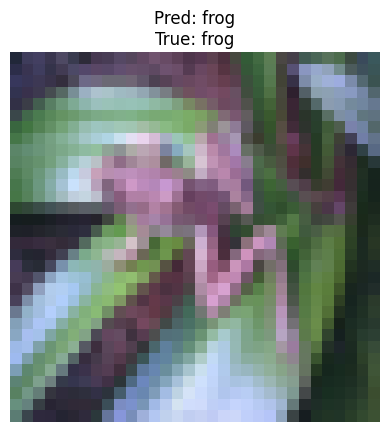

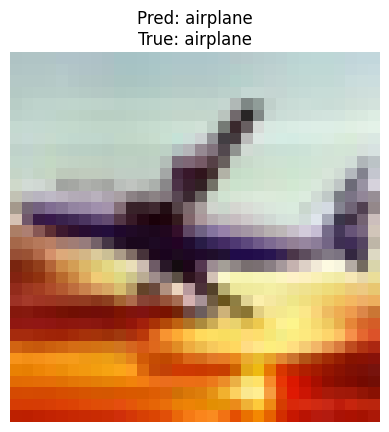

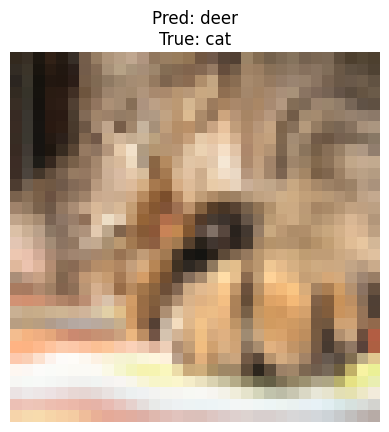

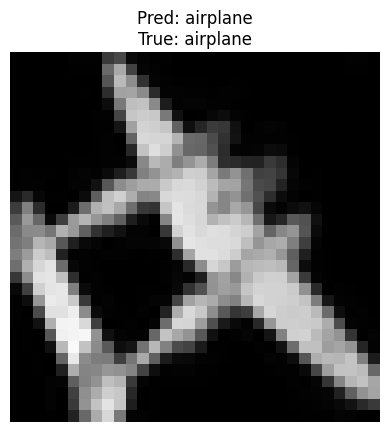

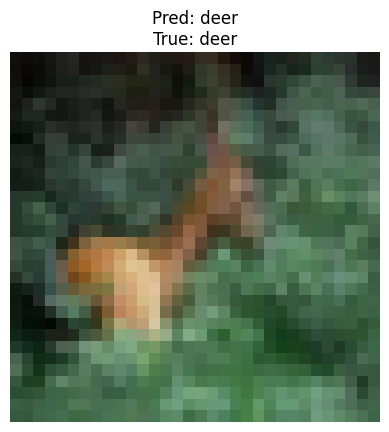

In [13]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# === CONFIG ===
weights_dir = "weights_txt"

# === Hardcoded class labels ===
class_labels = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}

# === Rebuild model architecture (must match training) ===
def build_model():
    model = models.Sequential()

    # First Block
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D())
    model.add(layers.Dropout(0.25))

    # Second Block
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D())
    model.add(layers.Dropout(0.35))

    # Third Block (reduced)
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D())
    model.add(layers.Dropout(0.4))

    # Dense Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))

    return model


# === Load weights from .txt files ===
def load_weights_from_txt(model, weights_dir):
    for i, layer in enumerate(model.layers):
        weights = []

        # BatchNorm layers: 4 params
        if isinstance(layer, tf.keras.layers.BatchNormalization):
            for kind in ["gamma", "beta", "moving_mean", "moving_variance"]:
                shape_file = os.path.join(weights_dir, f"layer_{i}_{kind}_shape.txt")
                data_file = os.path.join(weights_dir, f"layer_{i}_{kind}.txt")

                with open(shape_file, "r") as f:
                    shape = tuple(map(int, f.read().split()))
                arr = np.loadtxt(data_file).reshape(shape)
                weights.append(arr)

        # Conv2D / Dense: kernel + bias
        elif isinstance(layer, (tf.keras.layers.Conv2D, tf.keras.layers.Dense)):
            for kind in ["kernel", "bias"]:
                shape_file = os.path.join(weights_dir, f"layer_{i}_{kind}_shape.txt")
                data_file = os.path.join(weights_dir, f"layer_{i}_{kind}.txt")

                with open(shape_file, "r") as f:
                    shape = tuple(map(int, f.read().split()))
                arr = np.loadtxt(data_file).reshape(shape)
                weights.append(arr)

        # Set weights if applicable
        if weights:
            layer.set_weights(weights)

# === Load test images from CIFAR-10 ===
(_, _), (x_test, y_test) = cifar10.load_data()
x_test = x_test.astype("float32") / 255.0

# Pick 5 random samples
indices = np.random.choice(len(x_test), 5, replace=False)
sample_images = x_test[indices]
sample_labels = y_test[indices]

# === Build and load model ===
model = build_model()
load_weights_from_txt(model, weights_dir)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# === Run inference ===
predictions = model.predict(sample_images)

# === Display results ===
for i in range(5):
    plt.imshow(sample_images[i])
    plt.axis('off')
    pred_class = np.argmax(predictions[i])
    true_class = sample_labels[i][0]
    plt.title(f"Pred: {class_labels[pred_class]}\nTrue: {class_labels[true_class]}")
    plt.show()

In [14]:
import os
import zipfile

weights_dir = "weights_txt"
zip_filename = "weights_txt.zip"

with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, _, files in os.walk(weights_dir):
        for file in files:
            file_path = os.path.join(root, file)
            arcname = os.path.relpath(file_path, start=weights_dir)
            zipf.write(file_path, arcname)

print(f"✅ Zipped all files in '{weights_dir}' to '{zip_filename}'")

✅ Zipped all files in 'weights_txt' to 'weights_txt.zip'
